# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 14.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
182931,0.6592,0.1538,0.0977,0.0488,0.0488,0.0977,0.1440,0.2344,0.0366,0.1294,8,8,10,10
254480,0.3687,0.0024,0.0024,0.0024,0.0024,0.0024,0.0171,0.0903,0.0024,0.0073,0,0,0,0
143354,4.3408,2.0239,0.8398,0.3955,0.3369,0.5835,0.9375,0.6201,0.9644,0.6494,1,1,6,6
120065,0.3296,0.0293,0.0024,0.0024,0.0024,0.0024,0.0098,0.1050,0.0024,0.0024,3,0,3,0
360312,0.2954,0.1245,0.2222,0.4370,0.0806,0.0757,0.0659,0.1074,0.1001,0.0708,6,6,13,13


In [3]:
raw_data.shape

(461607, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461607 entries, 0 to 461606
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          461607 non-null  float64
 1   Emg2          461607 non-null  float64
 2   Emg3          461607 non-null  float64
 3   Emg4          461607 non-null  float64
 4   Emg5          461607 non-null  float64
 5   Emg6          461607 non-null  float64
 6   Emg7          461607 non-null  float64
 7   Emg8          461607 non-null  float64
 8   Emg9          461607 non-null  float64
 9   Emg10         461607 non-null  float64
 10  repetition    461607 non-null  int64  
 11  rerepetition  461607 non-null  int64  
 12  stimulus      461607 non-null  int64  
 13  restimulus    461607 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 49.3 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000,461607.000000
mean,0.562477,0.171519,0.099438,0.062419,0.029975,0.052018,0.200229,0.255614,0.076876,0.212711,3.195770,2.497919,5.663920,4.565063
std,0.579902,0.276268,0.182943,0.130411,0.059618,0.106883,0.360185,0.212620,0.184109,0.308897,3.486784,3.364923,6.588134,6.471103
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.117200,0.002400,0.002400,0.002400,0.002400,0.002400,0.019500,0.144000,0.002400,0.017100,0.000000,0.000000,0.000000,0.000000
50%,0.368700,0.065900,0.017100,0.002400,0.002400,0.007300,0.075700,0.217300,0.002400,0.090300,2.000000,0.000000,3.000000,0.000000
75%,0.849600,0.229500,0.122100,0.061000,0.029300,0.063500,0.231900,0.280800,0.073200,0.285600,6.000000,5.000000,10.000000,9.000000
max,4.668000,3.747600,2.961400,2.023900,0.808100,2.138700,4.663100,3.269000,3.242200,4.602100,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     193393
2      15514
12     15509
8      15507
7      15504
4      15501
5      15476
9      15465
6      15462
11     15461
3      15452
1      15435
10     15432
17     10343
13     10342
14     10337
15     10300
16     10263
19      5171
21      5163
18      5161
20      5147
22      5138
23      5131
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

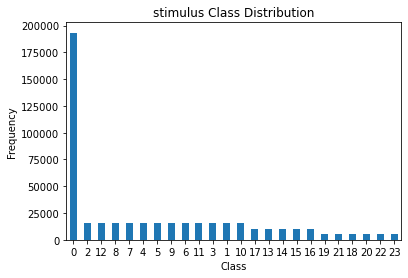

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
271473,0.0562,0.0171,0.0024,0.0024,0.0024,0.0146,0.0317,0.0464,0.0024,0.0488,0,0,0,0
76908,0.3296,0.0586,0.0757,0.0317,0.0024,0.0024,0.0415,0.1636,0.0635,0.0879,2,2,10,10
302838,0.3540,0.0464,0.0024,0.0024,0.0024,0.0049,0.0781,0.2124,0.0024,0.0073,0,0,0,0
3115,1.1450,0.3589,0.2954,0.0684,0.0220,0.0586,0.3784,0.3101,0.4663,0.2319,4,4,1,1
164783,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0342,0.0024,0.0024,0,0,0,0


In [12]:
raw_data.shape

(390414, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390414 entries, 0 to 461606
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          390414 non-null  float64
 1   Emg2          390414 non-null  float64
 2   Emg3          390414 non-null  float64
 3   Emg4          390414 non-null  float64
 4   Emg5          390414 non-null  float64
 5   Emg6          390414 non-null  float64
 6   Emg7          390414 non-null  float64
 7   Emg8          390414 non-null  float64
 8   Emg9          390414 non-null  float64
 9   Emg10         390414 non-null  float64
 10  repetition    390414 non-null  int64  
 11  rerepetition  390414 non-null  int64  
 12  stimulus      390414 non-null  int64  
 13  restimulus    390414 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 52.7 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [16]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

# Decision Tree

In [17]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred1 = tree.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 82.06011551810252


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     37515
           1       0.82      0.81      0.81      2235
           2       0.71      0.71      0.71      2340
           3       0.70      0.71      0.71      2154
           4       0.72      0.74      0.73      2186
           5       0.70      0.72      0.71      2062
           6       0.72      0.74      0.73      2329
           7       0.68      0.69      0.68      2264
           8       0.67      0.68      0.68      2354
           9       0.72      0.70      0.71      2352
          10       0.71      0.71      0.71      2117
          11       0.70      0.71      0.71      2378
          12       0.69      0.70      0.69      2567
          13       0.70      0.73      0.72      1473
          14       0.70      0.71      0.70      1438
          15       0.71      0.70      0.70      1529
          16       0.75      0.72      0.73      1614
 

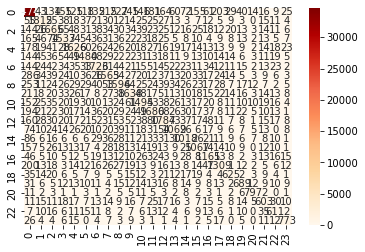

In [20]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1.3280483587976897
MSE: 14.50328496599772
RMSE: 3.8083178656721555


In [22]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8213411779393643
Recall Score :  0.8206011551810253
f1_score :  0.8209245069155792


# KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 88.50710141772217


Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     37515
           1       0.91      0.89      0.90      2235
           2       0.82      0.79      0.80      2340
           3       0.84      0.80      0.82      2154
           4       0.84      0.81      0.83      2186
           5       0.85      0.78      0.82      2062
           6       0.85      0.82      0.83      2329
           7       0.86      0.76      0.81      2264
           8       0.83      0.76      0.79      2354
           9       0.86      0.76      0.81      2352
          10       0.88      0.75      0.81      2117
          11       0.83      0.76      0.80      2378
          12       0.85      0.78      0.81      2567
          13       0.88      0.83      0.85      1473
          14       0.86      0.76      0.81      1438
          15       0.86      0.78      0.82      1529
          16       0.86      0.83      0.84      1614
 

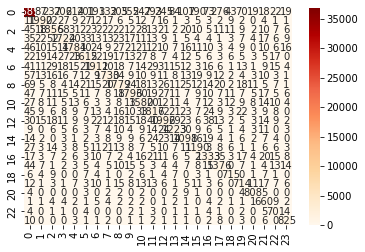

In [26]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.869997310554154
MSE: 9.577782615934327
RMSE: 3.094799285241989


In [28]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.8835305421782199
Recall Score :  0.8850710141772217
f1_score :  0.882557799481273


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 93.12782551899902


Classification report : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.95     37515
           1       0.98      0.94      0.96      2235
           2       0.94      0.88      0.91      2340
           3       0.95      0.87      0.91      2154
           4       0.95      0.88      0.91      2186
           5       0.96      0.87      0.91      2062
           6       0.95      0.89      0.92      2329
           7       0.94      0.82      0.88      2264
           8       0.94      0.82      0.88      2354
           9       0.93      0.84      0.88      2352
          10       0.95      0.85      0.90      2117
          11       0.94      0.85      0.89      2378
          12       0.94      0.86      0.90      2567
          13       0.94      0.91      0.92      1473
          14       0.95      0.86      0.90      1438
          15       0.93      0.84      0.88      1529
          16       0.93      0.89      0.91      1614
 

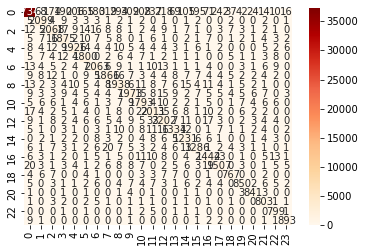

In [32]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.5624527746116312
MSE: 6.393709258097153
RMSE: 2.5285785054249654


In [34]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9324468342083587
Recall Score :  0.9312782551899902
f1_score :  0.9301578311453739


# XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

C:\Users\nafem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:11:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [36]:
y_pred4 = xgb.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 85.31306430336949


Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.98      0.94     37515
           1       0.92      0.82      0.87      2235
           2       0.79      0.70      0.74      2340
           3       0.80      0.73      0.76      2154
           4       0.81      0.70      0.75      2186
           5       0.81      0.73      0.77      2062
           6       0.86      0.76      0.81      2329
           7       0.83      0.66      0.73      2264
           8       0.74      0.64      0.69      2354
           9       0.76      0.70      0.73      2352
          10       0.77      0.69      0.73      2117
          11       0.80      0.69      0.74      2378
          12       0.79      0.70      0.74      2567
          13       0.80      0.76      0.78      1473
          14       0.79      0.71      0.75      1438
          15       0.77      0.74      0.75      1529
          16       0.78      0.76      0.77      1614
 

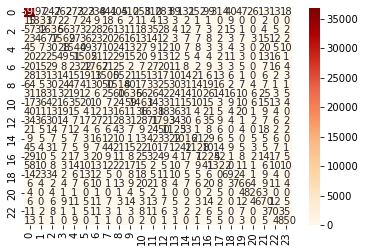

In [38]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 1.060294814492271
MSE: 11.402238643494742
RMSE: 3.376720101443817


In [40]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.849025705406182
Recall Score :  0.8531306430336949
f1_score :  0.8487030990430992


# ExtraTreesClassifier

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [42]:
y_pred5 = extratree.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 93.73231049011949


Classification report : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.95     37515
           1       0.99      0.95      0.97      2235
           2       0.96      0.89      0.92      2340
           3       0.97      0.88      0.92      2154
           4       0.97      0.89      0.93      2186
           5       0.97      0.88      0.92      2062
           6       0.97      0.90      0.93      2329
           7       0.95      0.83      0.89      2264
           8       0.95      0.83      0.89      2354
           9       0.95      0.85      0.90      2352
          10       0.96      0.86      0.91      2117
          11       0.96      0.86      0.91      2378
          12       0.96      0.87      0.91      2567
          13       0.95      0.92      0.94      1473
          14       0.95      0.87      0.91      1438
          15       0.94      0.85      0.90      1529
          16       0.95      0.91      0.93      1614
 

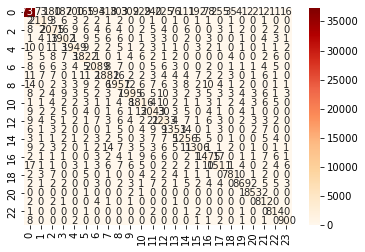

In [44]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [45]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.5274259441875953
MSE: 6.052649104158395
RMSE: 2.460213223311832


In [46]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9392231911157174
Recall Score :  0.9373231049011949
f1_score :  0.9364292333868092
